Nome: Ricardo Cabral Penteado - NUSP: 13813331

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
import seaborn as sns
import seaborn as sns
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from keras.preprocessing.text import Tokenizer
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
df = pd.read_csv('/content/B2W-Reviews01.csv')

<ipython-input-3-83efbd32bbcd>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/B2W-Reviews01.csv')


In [4]:
display(df)

,submission_date,reviewer_id,product_id,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,overall_rating,recommend_to_a_friend,review_text,reviewer_birth_year,reviewer_gender,reviewer_state
0,2018-01-01 00:11:28,d0fb1ca69422530334178f5c8624aa7a99da47907c44de...,132532965,Notebook Asus Vivobook Max X541NA-GO472T Intel...,NaN,Informática,Notebook,Bom,4,Yes,Estou contente com a compra entrega rápida o ú...,1958.0,F,RJ
1,2018-01-01 00:13:48,014d6dc5a10aed1ff1e6f349fb2b059a2d3de511c7538a...,22562178,Copo Acrílico Com Canudo 500ml Rocie,NaN,Utilidades Domésticas,"Copos, Taças e Canecas","Preço imbatível, ótima qualidade",4,Yes,"Por apenas R$1994.20,eu consegui comprar esse ...",1996.0,M,SC
2,2018-01-01 00:26:02,44f2c8edd93471926fff601274b8b2b5c4824e386ae4f2...,113022329,Panela de Pressão Elétrica Philips Walita Dail...,philips walita,Eletroportáteis,Panela Elétrica,ATENDE TODAS AS EXPECTATIVA.,4,Yes,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,1984.0,M,SP
3,2018-01-01 00:35:54,ce741665c1764ab2d77539e18d0e4f66dde6213c9f0863...,113851581,Betoneira Columbus - Roma Brinquedos,roma jensen,Brinquedos,Veículos de Brinquedo,presente mais que desejado,4,Yes,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...,1985.0,F,SP
4,2018-01-01 01:00:28,7d7b6b18dda804a897359276cef0ca252f9932bf4b5c8e...,131788803,"Smart TV LED 43"" LG 43UJ6525 Ultra HD 4K com C...",lg,TV e Home Theater,TV,"Sem duvidas, excelente",5,Yes,"A entrega foi no prazo, as americanas estão de...",1994.0,M,MG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132368,2018-05-31 23:30:50,15f20e95ff44163f3175aaf67a5ae4a94d5030b409e521...,17962233,Carregador De Pilha Sony + 4 Pilhas Aa 2500mah,NaN,Câmeras e Filmadoras,Acessórios para Câmeras e Filmadoras,Ótimo produto!,5,Yes,"Vale muito, estou usando no controle do Xbox e...",1988.0,M,RS
132369,2018-05-31 23:42:25,def7cf9028b0673ab8bca3b1d06e085461fafb88cd48d9...,132631701,Mop Giratório Fit + Refil Extra - At Home,NaN,Utilidades Domésticas,Material de Limpeza,Sensacional,5,Yes,"Prático e barato, super indico o produto para ...",1979.0,F,SP
132370,2018-05-31 23:44:16,7bcbf542f5d7dd9a9a192a6805adba7a7a4c1ce3bf00df...,16095859,Fita Led 5m Rgb 3528 Siliconada Com 300 Leds C...,NaN,Automotivo,Iluminação,Ótimo produto,4,Yes,Chegou antes do prazo previsto e corresponde a...,1979.0,F,PR
132371,2018-05-31 23:46:48,e6fb0b19277d01c2a300c7837a105f3c369377e92f9c19...,6774907,Etiquetas Jurídicas Vade Mecum - Marca Fácil,marca facil,Papelaria,Material de Escritório,O produto não é bom.,1,No,"Material fraco, poderia ser melhor. Ficou deve...",1991.0,M,RJ


In [5]:
df.describe()

,overall_rating,reviewer_birth_year
count,132373.000000,126389.000000
mean,3.492004,1977.495898
std,1.530289,21.895265
min,1.000000,59.000000
25%,2.000000,1969.000000
50%,4.000000,1980.000000
75%,5.000000,1987.000000
max,5.000000,2018.000000


In [6]:
df = df[['review_text', 'overall_rating']]
display(df)

,review_text,overall_rating
0,Estou contente com a compra entrega rápida o ú...,4
1,"Por apenas R$1994.20,eu consegui comprar esse ...",4
2,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,4
3,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...,4
4,"A entrega foi no prazo, as americanas estão de...",5
...,...,...
132368,"Vale muito, estou usando no controle do Xbox e...",5
132369,"Prático e barato, super indico o produto para ...",5
132370,Chegou antes do prazo previsto e corresponde a...,4
132371,"Material fraco, poderia ser melhor. Ficou deve...",1


In [7]:
df = df.dropna(subset=['review_text', 'overall_rating'])
display(df)

,review_text,overall_rating
0,Estou contente com a compra entrega rápida o ú...,4
1,"Por apenas R$1994.20,eu consegui comprar esse ...",4
2,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,4
3,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...,4
4,"A entrega foi no prazo, as americanas estão de...",5
...,...,...
132368,"Vale muito, estou usando no controle do Xbox e...",5
132369,"Prático e barato, super indico o produto para ...",5
132370,Chegou antes do prazo previsto e corresponde a...,4
132371,"Material fraco, poderia ser melhor. Ficou deve...",1


In [8]:
train, temp = train_test_split(df, test_size=0.35)
valid, test = train_test_split(temp, test_size=(25/35))

train.to_csv('treinamento.csv')
valid.to_csv('validacao.csv')
test.to_csv('teste.csv')

In [9]:
# tamanho da maior sequência (ou revisão)
tammax = train['review_text'].apply(lambda x: len(str(x).split())).max()

# total de palavras únicas no dataframe
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train['review_text'])
vocab_size = len(tokenizer.word_index)

print("Tamanho máximo de sequência:", tammax)
print("Tamanho do vocabulário:", vocab_size)


Tamanho máximo de sequência: 795
Tamanho do vocabulário: 41107


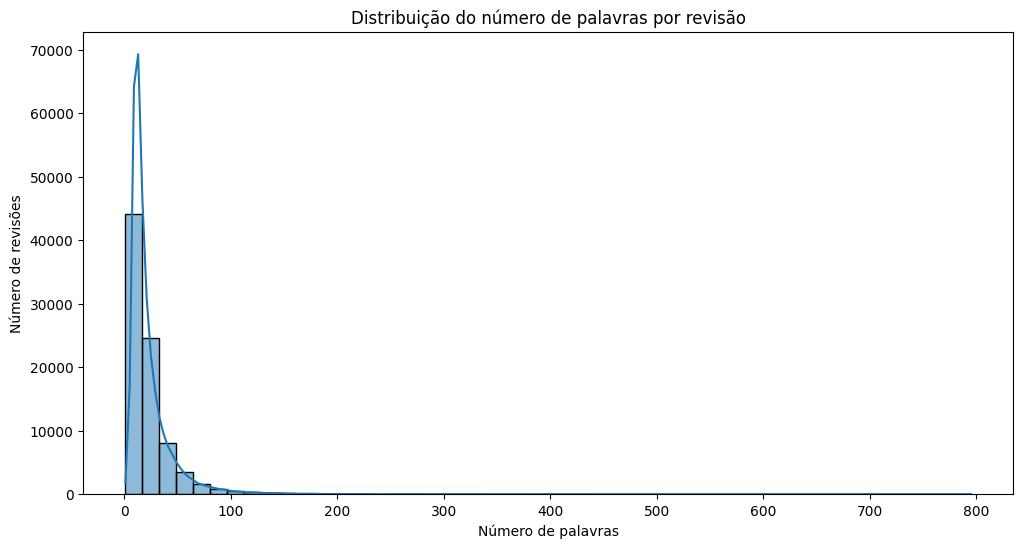

In [10]:
# Calcula o número de palavras para cada revisão
train['num_words'] = train['review_text'].apply(lambda x: len(str(x).split()))

# Plot
plt.figure(figsize=(12, 6))
sns.histplot(train['num_words'], bins=50, kde=True)
plt.title('Distribuição do número de palavras por revisão')
plt.xlabel('Número de palavras')
plt.ylabel('Número de revisões')
plt.show()


MODELO 1 - LSTM Unidirecional

In [18]:
# Hyperparameters
tammax = 795
batch_size = 32
vocab_size = 20000

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(train['review_text'])
train_sequences = tokenizer.texts_to_sequences(train['review_text'])
valid_sequences = tokenizer.texts_to_sequences(valid['review_text'])

X_train = pad_sequences(train_sequences, maxlen=tammax)
X_valid = pad_sequences(valid_sequences, maxlen=tammax)

y_train = to_categorical(train['overall_rating'] - 1, 5)
y_valid = to_categorical(valid['overall_rating'] - 1, 5)


def create_model(bidirectional=False, dropout_rate=0.0):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=tammax))

    if bidirectional:
        model.add(Bidirectional(LSTM(64, return_sequences=True)))
    else:
        model.add(LSTM(64, return_sequences=True))

    model.add(LSTM(64))
    model.add(Dropout(dropout_rate))
    model.add(Dense(5, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # Mudança aqui: categorical_crossentropy
    return model

history_list = []

for bidir in [False, True]:
    for dropout_rate in [0.0, 0.25, 0.5]:
        model = create_model(bidirectional=bidir, dropout_rate=dropout_rate)
        # Sumário do Modelo
        print("Model Summary for bidirectional={}, dropout_rate={}".format(bidir, dropout_rate))
        model.summary()
        print("\n\n")

        # Plotagem do Modelo
        tf.keras.utils.plot_model(
            model,
            to_file='model_{}_{}.png'.format(bidir, dropout_rate),
            show_shapes=True,
            show_dtype=True,
            show_layer_names=True,
            rankdir='LR',
            expand_nested=True,
            dpi=96,
            show_layer_activations=True,
            show_trainable=True
        )

        checkpoint = ModelCheckpoint('best_model_{}_{}.h5'.format(bidir, dropout_rate), monitor='val_loss', verbose=1, save_best_only=True, mode='min')

        early_stopping = EarlyStopping(monitor='val_loss', patience=50, verbose=1, mode='min')

        history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=100, batch_size=batch_size, callbacks=[checkpoint, early_stopping])
        history_list.append((bidir, dropout_rate, history))


Model Summary for bidirectional=False, dropout_rate=0.0
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 795, 128)          2560000   
                                                                 
 lstm_14 (LSTM)              (None, 795, 64)           49408     
                                                                 
 lstm_15 (LSTM)              (None, 64)                33024     
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 5)                 325       
                                                                 
Total params: 2642757 (10.08 MB)
Trainable params: 2642757 (10.08 MB)
Non-trainable params: 0 (0.00 Byte)
________________________

Para o modelo Unidirectional LSTM with 0.0% Dropout:
    Melhor época: 2
    Perda de validação na melhor época: 0.9184806942939758
--------------------------------------


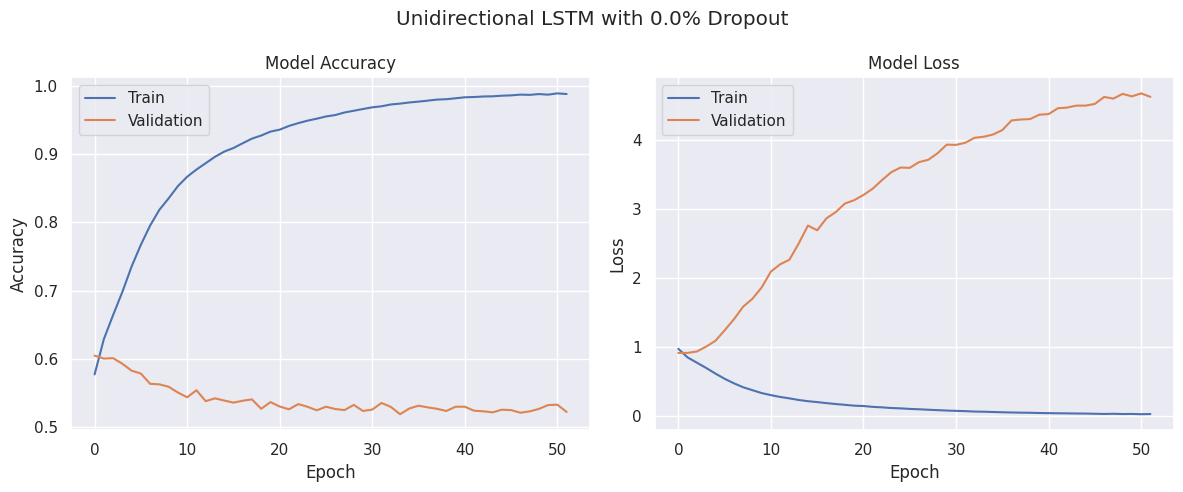

Para o modelo Unidirectional LSTM with 25.0% Dropout:
    Melhor época: 2
    Perda de validação na melhor época: 0.9176419973373413
--------------------------------------


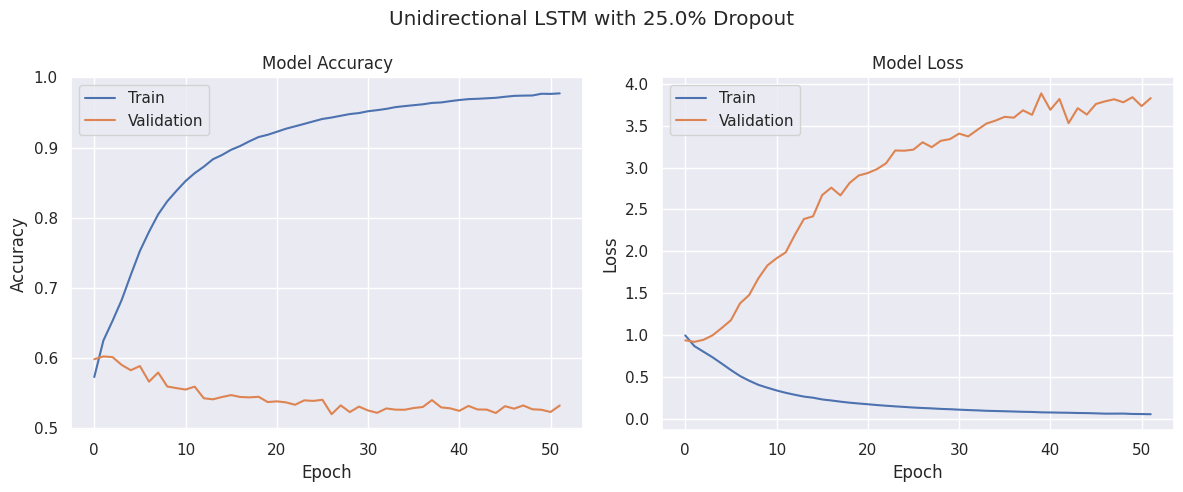

Para o modelo Unidirectional LSTM with 50.0% Dropout:
    Melhor época: 2
    Perda de validação na melhor época: 0.9159805774688721
--------------------------------------


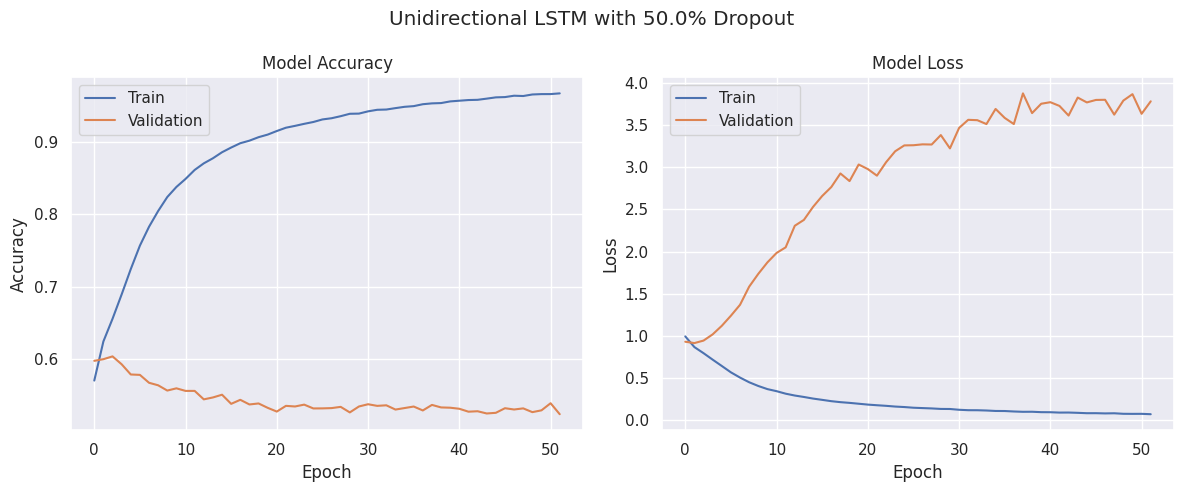

Para o modelo Bidirectional LSTM with 0.0% Dropout:
    Melhor época: 2
    Perda de validação na melhor época: 0.9055081605911255
--------------------------------------


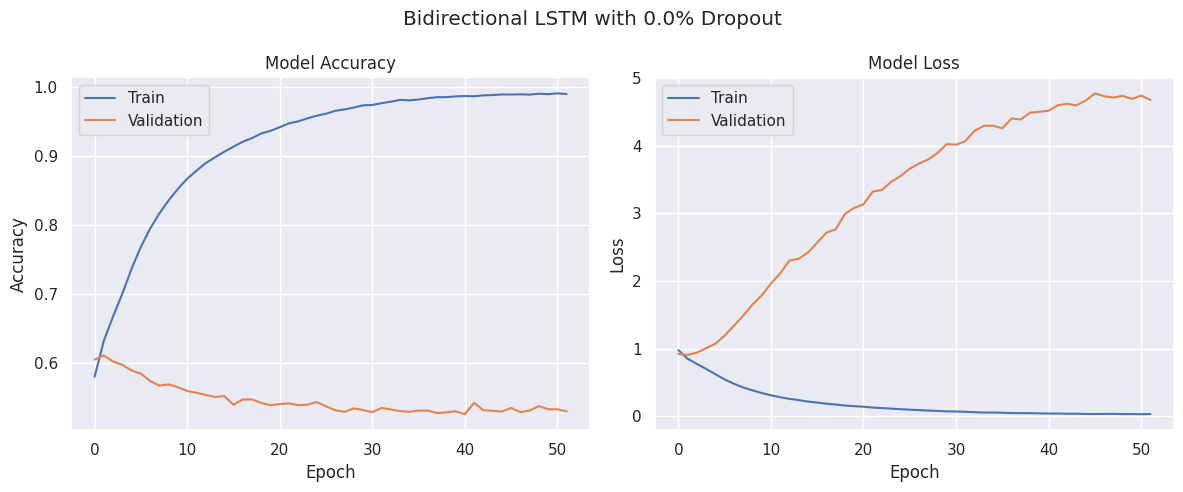

Para o modelo Bidirectional LSTM with 25.0% Dropout:
    Melhor época: 2
    Perda de validação na melhor época: 0.9267004728317261
--------------------------------------


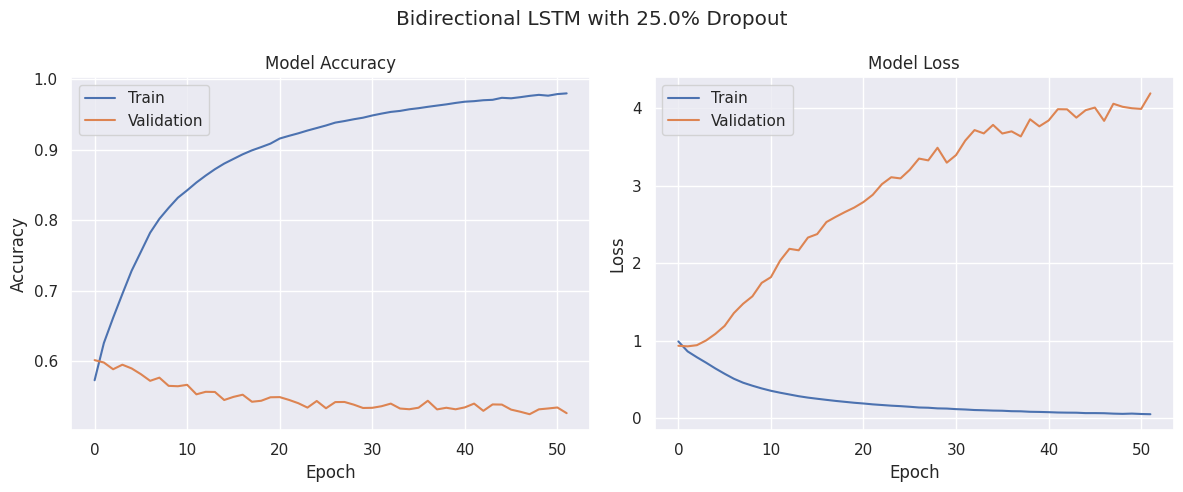

Para o modelo Bidirectional LSTM with 50.0% Dropout:
    Melhor época: 2
    Perda de validação na melhor época: 0.9143401384353638
--------------------------------------


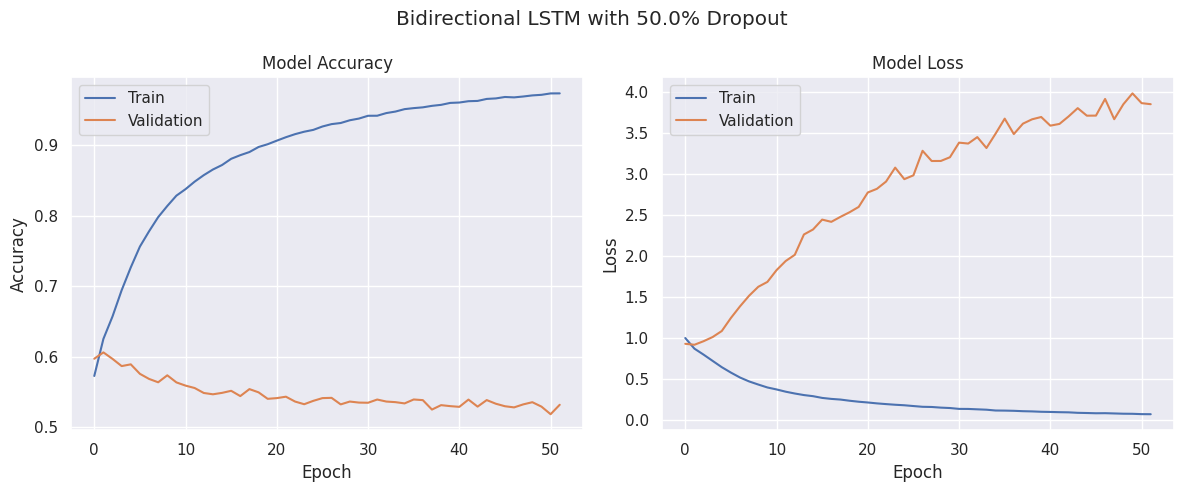

In [42]:
sns.set()

def plot_history(history, title):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

best_global_loss = np.inf
best_global_model = ""

for bidir, dropout_rate, history in history_list:
    direction = 'Bidirectional' if bidir else 'Unidirectional'
    title = f'{direction} LSTM with {dropout_rate*100}% Dropout'

    # Encontrar a melhor época para este modelo específico
    best_epoch = np.argmin(history.history['val_loss']) + 1  # +1 porque as listas em Python são baseadas em 0
    best_loss = history.history['val_loss'][best_epoch - 1]  # -1 porque as listas em Python são baseadas em 0

    print(f"Para o modelo {title}:")
    print(f"    Melhor época: {best_epoch}")
    print(f"    Perda de validação na melhor época: {best_loss}")
    print("--------------------------------------")

    # Rastrear o melhor modelo global
    if best_loss < best_global_loss:
        best_global_loss = best_loss
        best_global_model = title + f" (Época: {best_epoch})"

    plot_history(history, title)

In [26]:
# 1. Preparar o conjunto de teste
test_sequences = tokenizer.texts_to_sequences(test['review_text'])
X_test = pad_sequences(test_sequences, maxlen=tammax)
y_test = to_categorical(test['overall_rating'] - 1, 5)  # Convertendo para representação categórica

# 2. Carregar o modelo com a melhor acurácia de validação (certifique-se de que o nome do arquivo está correto)
best_model = load_model('/content/best_model_True_0.25.h5')

# 3. Avaliar o modelo no conjunto de teste
loss, accuracy = best_model.evaluate(X_test, y_test, verbose=1)

# 4. Imprimir as métricas
print("Loss no conjunto de teste:", loss)
print("Acurácia no conjunto de teste:", accuracy)


1009/1009 [==============================] - 34s 32ms/step - loss: 0.9150 - accuracy: 0.5982
Loss no conjunto de teste: 0.9150450229644775
Acurácia no conjunto de teste: 0.5981719493865967


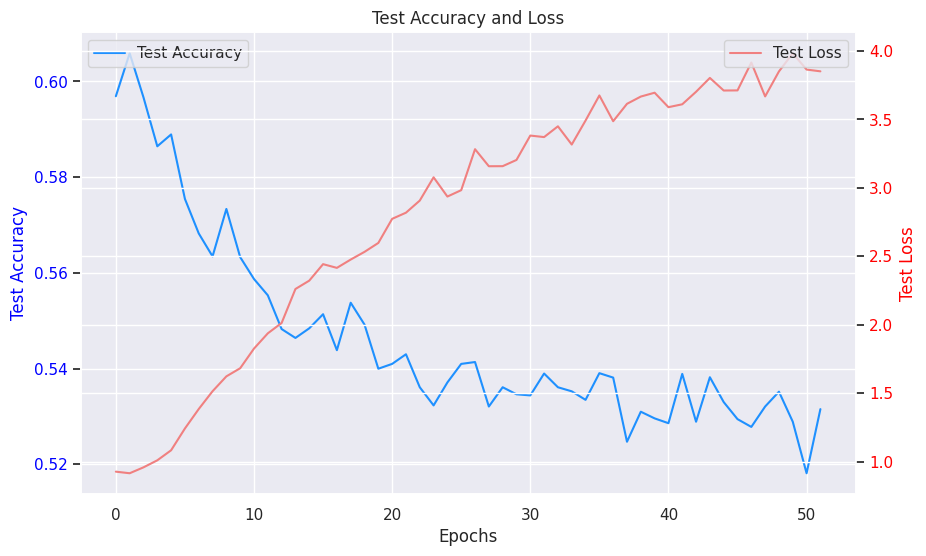

In [41]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico da acurácia no conjunto de teste (validação)
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Test Accuracy', color='blue')
ax1.plot(history.history['val_accuracy'], color='dodgerblue', label='Test Accuracy')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

# Criando o segundo eixo y para a perda no conjunto de teste (validação)
ax2 = ax1.twinx()
ax2.set_ylabel('Test Loss', color='red')
ax2.plot(history.history['val_loss'], color='lightcoral', label='Test Loss')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')

plt.title('Test Accuracy and Loss')
plt.show()


In [33]:
# Carregar o modelo
model_path = '/content/best_model_True_0.25.h5'
trained_model = load_model(model_path)

# Obter e imprimir as métricas que o modelo foi compilado com
print("Métricas do Modelo:")
print(trained_model.metrics_names)

# Exibir a estrutura do modelo
trained_model.summary()


Métricas do Modelo:
['loss', 'accuracy']
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 795, 128)          2560000   
                                                                 
 bidirectional_1 (Bidirecti  (None, 795, 128)          98816     
 onal)                                                           
                                                                 
 lstm_23 (LSTM)              (None, 64)                49408     
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 5)                 325       
                                                                 
Total params: 2708549 (10.33 MB)
Trainable params: 2708549 (10.33 MB)
Non-trai

1009/1009 [==============================] - 32s 31ms/step


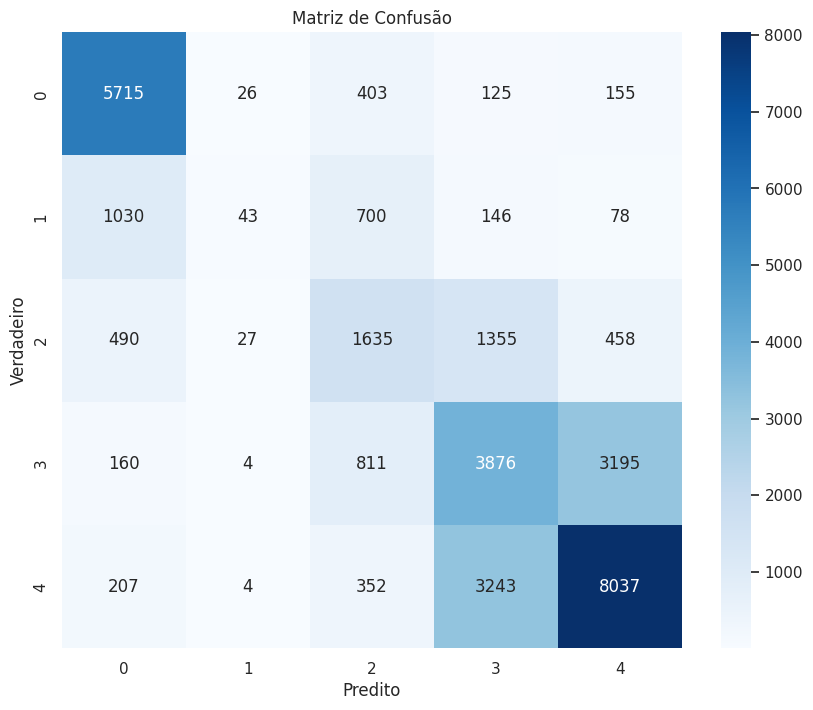

              precision    recall  f1-score   support

           0       0.75      0.89      0.81      6424
           1       0.41      0.02      0.04      1997
           2       0.42      0.41      0.42      3965
           3       0.44      0.48      0.46      8046
           4       0.67      0.68      0.68     11843

    accuracy                           0.60     32275
   macro avg       0.54      0.50      0.48     32275
weighted avg       0.58      0.60      0.58     32275



In [35]:
# Gerar previsões no conjunto de teste
y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Matriz de Confusão
cm = confusion_matrix(y_true, y_pred_classes)

# Plot da Matriz de Confusão
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

# Relatório de Classificação
print(classification_report(y_true, y_pred_classes))
